# Toy Data Showing How Smoother works

Import necessary modules: 

In [3]:
from scipy.spatial.distance import cdist
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Models import VKR

## Define the Smoother

In [2]:
def normalization(K):
    """
    Degree normalization.

    Parameters
    ----------
    K: array
        Matrix requires degree normalization.
    
    Returns
    ----------
    K_normalized: array
        Normalized matrix.
    
    """
    d1 = K.sum(axis=0) + 10e-8
    d2 = K.sum(axis=1) + 10e-8
    K_normalized = (K.T / np.sqrt(d2)).T / np.sqrt(d1)
    return K_normalized

def smoother(Y, K_Y, c, n):
    """
    This function is smoothing Y twice to Y_SS by the smoother. Also the smoothed Y is normalized to the scale of 0 to 1.

    Parameters
    ----------
    Y: array
        Matrix needs to be smoothed.

    Returns
    ----------
    min_max_normalized_matrix: array
        Smoothed and normalized matrix.
        
    """
    Y_SS =  ((1-c)*np.diag(np.ones(n))+c*normalization(K_Y)).dot((1-c)*(np.diag(np.ones(n))+c*normalization(K_Y))).dot(Y)
    min_val = np.min(Y_SS)
    max_val = np.max(Y_SS)
    min_max_normalized_matrix = (Y_SS - min_val) / (max_val - min_val)
    return min_max_normalized_matrix
def smoother2(Y, K_Y, c, n):
    """
    To show the necessity of smoothing Y twice, we also defined a function that smooths Y only once.

    Parameters
    ----------
    Y: array
        Matrix needs to be smoothed.

    Returns
    ----------
    min_max_normalized_matrix: array
        Smoothed and normalized matrix.
        
    """
    Y_S =  ((1-c)*np.diag(np.ones(n))+c*normalization(K_Y)).dot(Y)
    min_val = np.min(Y_S)
    max_val = np.max(Y_S)
    min_max_normalized_matrix = (Y_S - min_val) / (max_val - min_val)
    return min_max_normalized_matrix

## Visualize $Y$, $Y_S$ and $Y_SS$

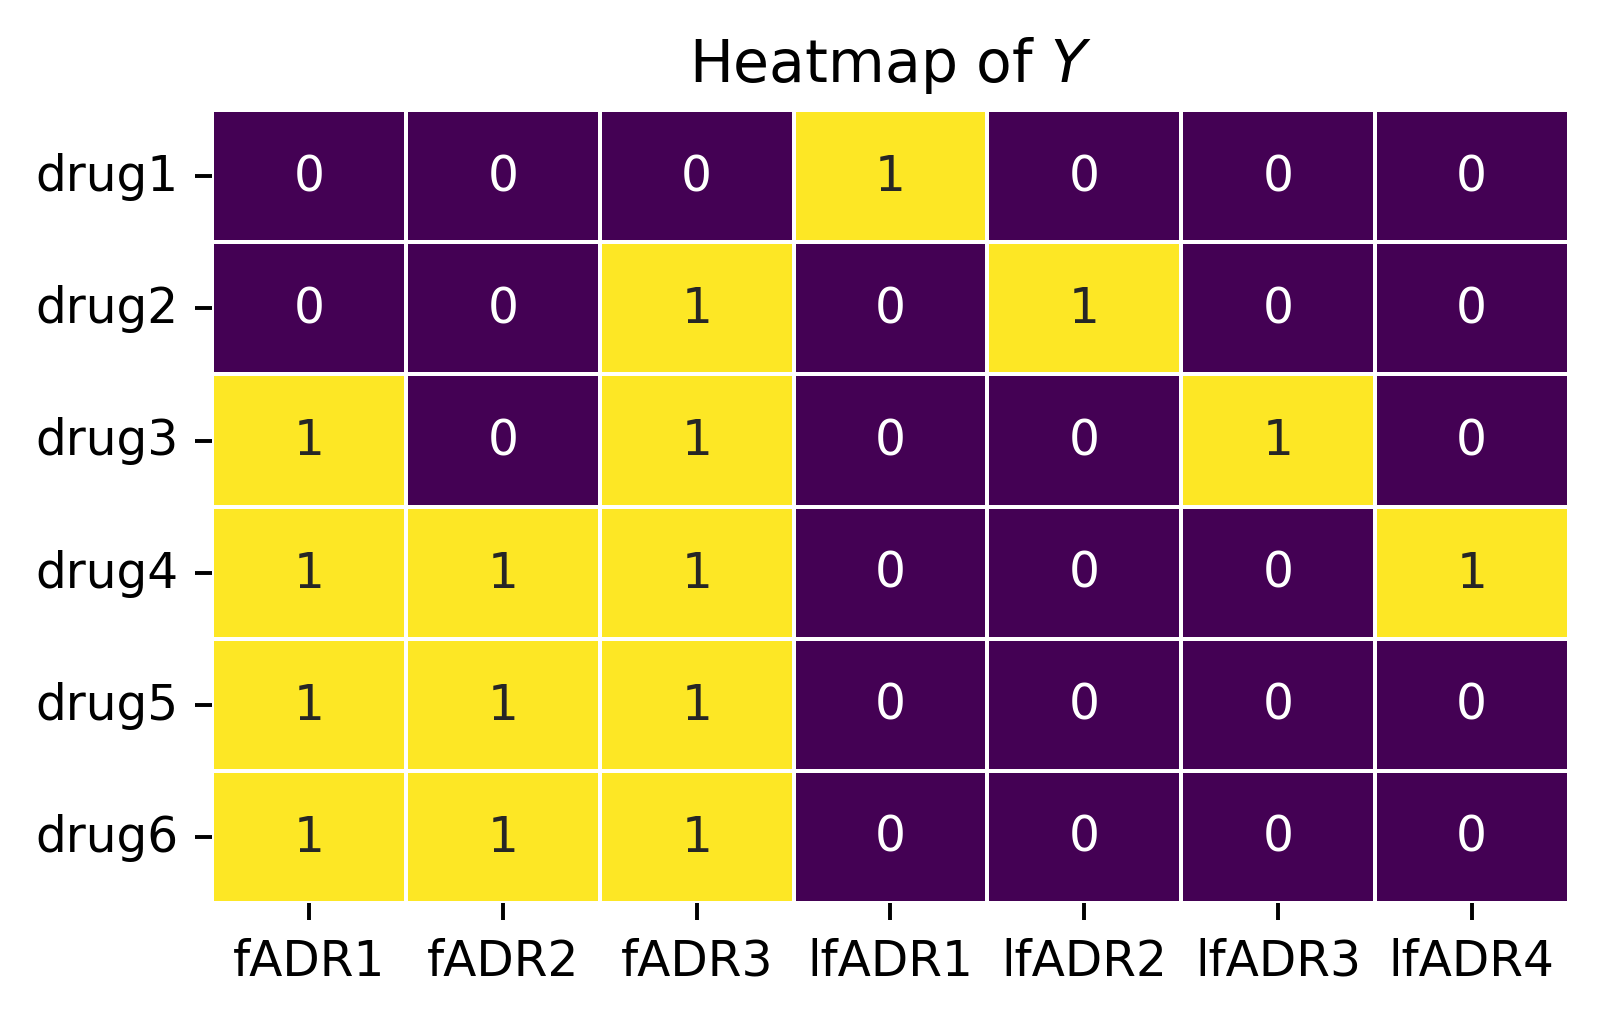

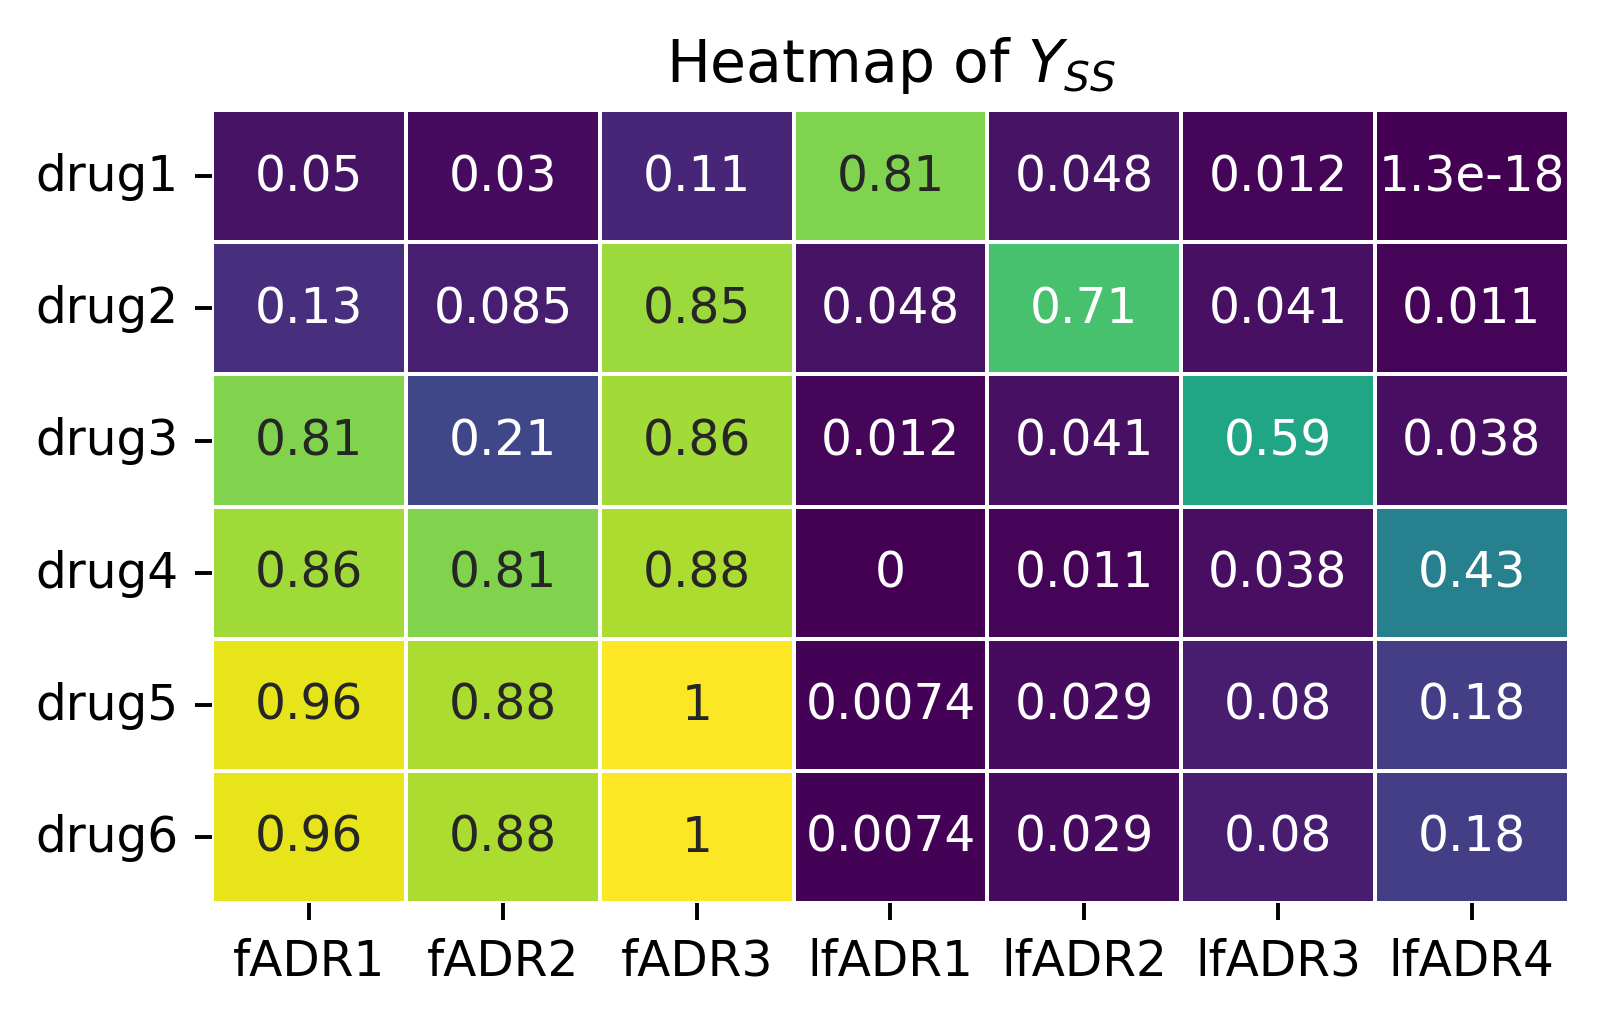

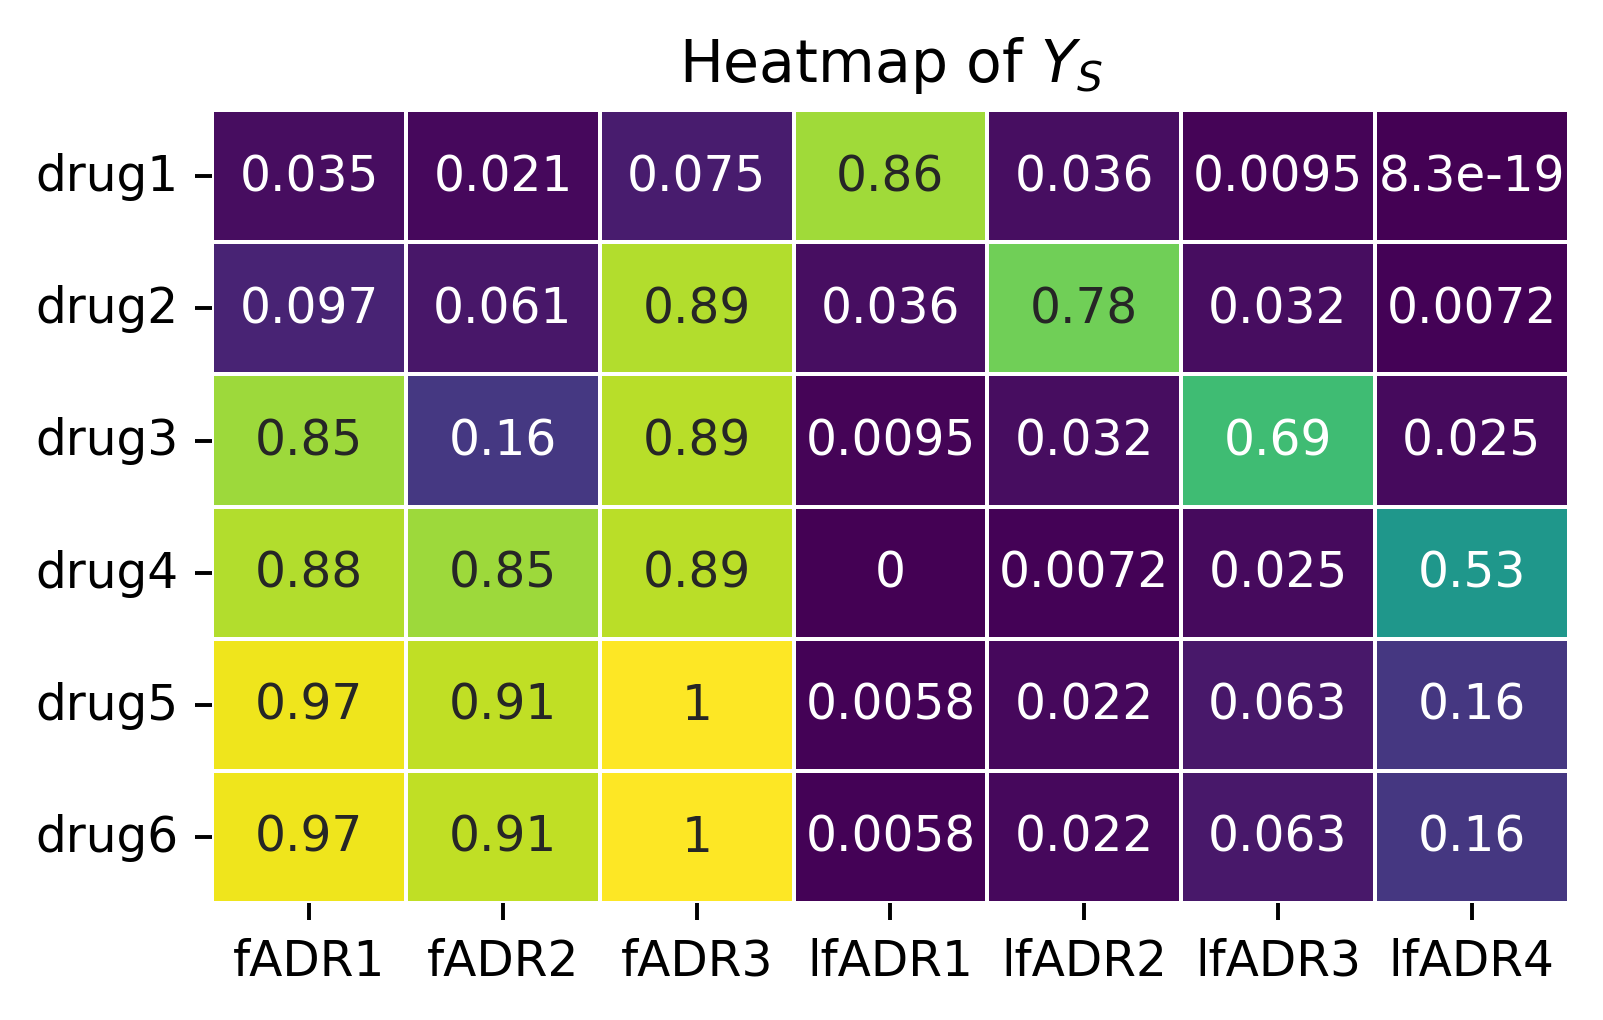

In [3]:
# Toy data Y
Y = np.array(
    [[0, 0, 0, 1, 0, 0, 0],
     [0, 0, 1, 0, 1, 0, 0],
     [1, 0, 1, 0, 0, 1, 0],
     [1, 1, 1, 0, 0, 0, 1],
     [1, 1, 1, 0, 0, 0, 0],
     [1, 1, 1, 0, 0, 0, 0]]).astype(float)
k = np.exp(-cdist(Y, Y)**2/1**2)
Y_SS=smoother(Y, k, 0.99, Y.shape[0])

# Plot heatmap
x_labels = ["fADR1", "fADR2", "fADR3", "lfADR1", "lfADR2", "lfADR3", "lfADR4"]
y_labels = [f'drug{i}' for i in range(1, Y.shape[0]+1)]

plt.figure(figsize=(5, 3), dpi=350)
sns.heatmap(Y, annot=True, cbar=False, cmap='viridis', linewidths=.5, xticklabels=x_labels, yticklabels=y_labels)
plt.title('Heatmap of $Y$')
plt.savefig(fname="figs/heatmapY.jpg", bbox_inches="tight")
plt.show()

plt.figure(figsize=(5, 3), dpi=350)
sns.heatmap(Y_SS, annot=True, cbar=False, cmap='viridis', linewidths=.5, xticklabels=x_labels, yticklabels=y_labels)
plt.title('Heatmap of $Y_{SS}$')
plt.savefig(fname="figs/heatmapYSS.jpg", bbox_inches="tight")
plt.show()

Y_S=smoother2(Y, k, 0.99, Y.shape[0])
plt.figure(figsize=(5, 3), dpi=350)
sns.heatmap(Y_S, annot=True, cbar=False, cmap='viridis', linewidths=.5, xticklabels=x_labels, yticklabels=y_labels)
plt.title('Heatmap of $Y_S$')
plt.savefig(fname="figs/heatmapYS.jpg", bbox_inches="tight")
plt.show()

## Visualize the example prediction of VKR

We set a extreme prediction of VKR to show the limitation of VKR:

/home/yezhao/anaconda3/envs/tf-2/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


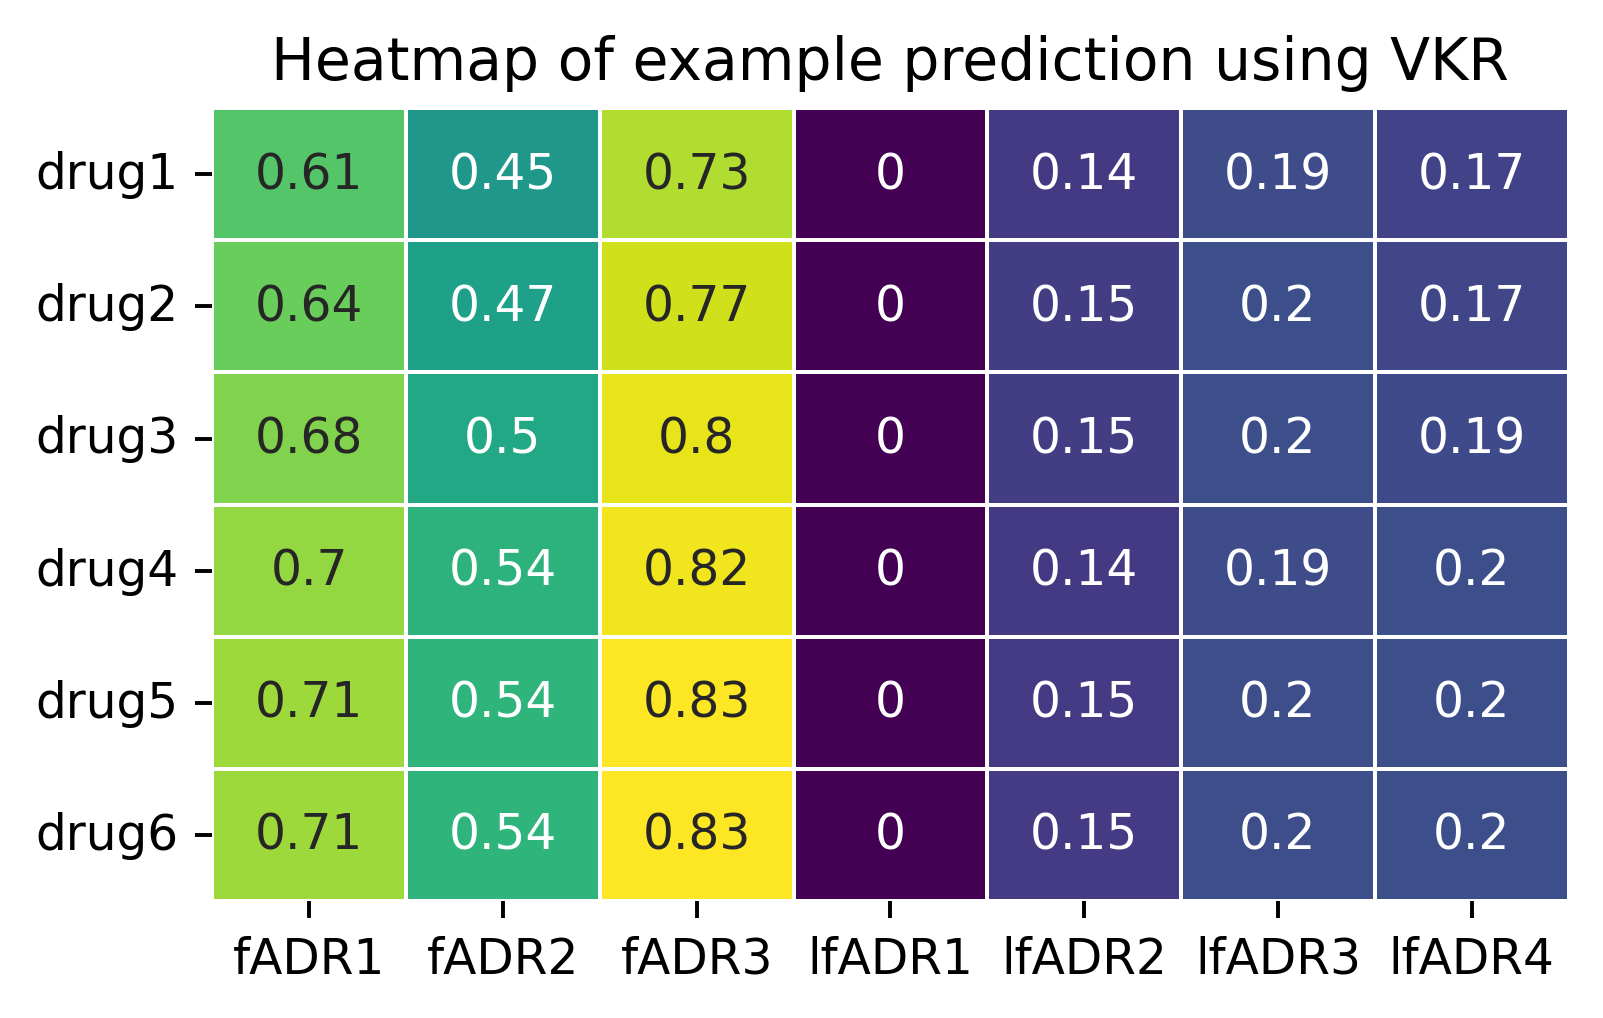

In [103]:
sigma = 5
lmd = 1
k = 2
model = VKR(sigma=sigma, lmd=lmd, k=k)
model.fit(X=Y,Y=Y)
Y_VKR = model.predict(X_new=Y)
min_val = np.min(Y_SS)
max_val = np.max(Y_SS)
min_max_normalized_matrix = (Y_SS - min_val) / (max_val - min_val)
Y_SS = np.array(
    Y_VKR).astype(float)
# k = np.exp(-cdist(Y, Y)**2/1**2)
# Y_SS=smoother(Y, k, 0.99, Y.shape[0])

# Plot heatmap
x_labels = ["fADR1", "fADR2", "fADR3", "lfADR1", "lfADR2", "lfADR3", "lfADR4"]
y_labels = [f'drug{i}' for i in range(1, Y.shape[0]+1)]

plt.figure(figsize=(5, 3), dpi=350)
sns.heatmap(Y_SS, annot=True, cbar=False, cmap='viridis', linewidths=.5, xticklabels=x_labels, yticklabels=y_labels)
plt.title('Heatmap of example prediction using VKR')
plt.savefig(fname="figs/heatmapVKR.jpg", bbox_inches="tight")
plt.show()